___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## Aparelhos e internet

___
## Introdução
A pesquisa tem o intuito de descobrir qual é o melhor investimento em aparelhos eletronicos  que acessam internet, com o objetivo no investimento de sofwares on lines e venda de hardwares.


Para isso sera necessário analizar qual foi o aparelho que mais cresceu no numero de usuarios do ano de 2013 á 2015


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
/Users/lucasvaz/Documents/insper/cd/projeto1/Ciencia-dos-Dados


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')
dados=pd.read_csv("DOM2015.csv")
dados2=pd.read_csv("DOM2013.csv")
dados2015=pd.read_excel("dados2015.xlsx")
dados2013=pd.read_excel("dados2013.xlsx")
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"'

In [4]:
#Filtrando dados desejados

netcell=dados.V02324
netcomp=dados.V02323
nettablet=dados.V02325
nettv=dados.V02326
netoutro=dados.V02327
estado=dados.UF
ano=dados.V0101
zona=dados.V4105

dados.loc[(dados.V4622==0),"Salários_minimos"]=0
for i in range(1,7):
    dados.loc[(dados.V4622==i),"Salários_minimos"]=0.5*i

#novo data frame

DF = pd.DataFrame()

#Dando nomes

DF["Ano"]=ano
DF["Estado"]=estado
DF["netCelular"]=netcell
DF["netMicroComputador"]=netcomp
DF["netTablet"]=nettablet
DF["netTv"]=nettv
DF["netOutros"]=netoutro
DF["SaláriosMin"]=dados.Salários_minimos
DF["zona"]=zona




#transformando variaveis

DF.Ano=DF.Ano.astype("category")
DF.estado=DF.Estado.astype("category")
DF.netCelular=DF.netCelular.astype("category")
DF.netMicroComputador=DF.netMicroComputador.astype("category")
DF.netTablet=DF.netTablet.astype("category")
DF.netTv=DF.netTv.astype("category")
DF.netOutros=DF.netOutros.astype("category")
DF.zona=DF.zona.astype("float")
DF.SaláriosMin = DF.SaláriosMin.astype("float")



#Traduzindo Numeros

DF.netCelular.cat.categories = (["tem acesso", "não tem acesso"])
DF.netMicroComputador.cat.categories = (["tem acesso", "não tem acesso"])
DF.netTablet.cat.categories = (["tem acesso", "não tem acesso"])
DF.netTv.cat.categories = (["tem acesso", "não tem acesso"])
DF.netOutros.cat.categories = (["tem acesso", "não tem acesso"])
DF.loc[(DF.Estado<= 17), "Região"] = "Norte"
DF.loc[(DF.Estado > 17) & (DF.Estado <=29 ),"Região"] = "Nordeste"
DF.loc[(DF.Estado >=31) & (DF.Estado <= 35),"Região"] = "Sudeste"
DF.loc[(DF.Estado >=41) & (DF.Estado <= 43),"Região"] = "Sul"
DF.loc[(DF.Estado >=50), "Região"] = "Centro"
DF.loc[(DF.zona <=3), "situação_censitária"] = "Urbana"
DF.loc[(DF.zona >3), "situação_censitária"] = "Rural"
DF=DF.dropna(how='any')
DF.head(10)


,Ano,Estado,netCelular,netMicroComputador,netTablet,netTv,netOutros,SaláriosMin,zona,Região,situação_censitária
2,2015,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,1.0,Norte,Urbana
3,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,1.0,Norte,Urbana
5,2015,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.5,1.0,Norte,Urbana
8,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,1.0,Norte,Urbana
10,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.5,1.0,Norte,Urbana
11,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,3.0,1.0,Norte,Urbana
13,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,1.0,Norte,Urbana
15,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,1.5,1.0,Norte,Urbana
17,2015,11,tem acesso,não tem acesso,tem acesso,não tem acesso,não tem acesso,1.5,1.0,Norte,Urbana
18,2015,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,1.0,Norte,Urbana


In [5]:
#Filtrando dados desejados 2013

netcell2=dados2.V02324
netcomp2=dados2.V02323
nettablet2=dados2.V02325
nettv2=dados2.V02326
netoutro2=dados2.V02327
estado2=dados2.UF
ano2=dados2.V0101

dados2.loc[(dados2.V4622==0),"Salários_minimos"]=0
for i in range(1,7):
    dados2.loc[(dados2.V4622==i),"Salários_minimos"]=0.5*i

#novo data frame

DF2 = pd.DataFrame()

#Dando nomes

DF2["Ano"]=ano2
DF2["Estado"]=estado2
DF2["netCelular"]=netcell2
DF2["netMicroComputador"]=netcomp2
DF2["netTablet"]=nettablet2
DF2["netTv"]=nettv2
DF2["netOutros"]=netoutro2
DF2["SaláriosMin"]=dados.Salários_minimos




#transformando variaveis

DF2.Ano=DF2.Ano.astype("category")
DF2.SaláriosMin = DF2.SaláriosMin.astype("float")
DF2.netCelular=DF2.netCelular.astype("category")
DF2.netMicroComputador=DF2.netMicroComputador.astype("category")
DF2.netTablet=DF2.netTablet.astype("category")
DF2.netTv=DF2.netTv.astype("category")
DF2.netOutros=DF2.netOutros.astype("category")



#Traduzindo Numeros

DF2.netCelular.cat.categories = (["tem acesso", "não tem acesso"])
DF2.netMicroComputador.cat.categories = (["tem acesso", "não tem acesso"])
DF2.netTablet.cat.categories = (["tem acesso", "não tem acesso"])
DF2.netTv.cat.categories = (["tem acesso", "não tem acesso"])
DF2.netOutros.cat.categories = (["tem acesso", "não tem acesso"])
DF2.loc[(DF2.Estado<= 17), "Região"] = "Norte"
DF2.loc[(DF2.Estado > 17) & (DF2.Estado <=29 ),"Região"] = "Nordeste"
DF2.loc[(DF2.Estado >=31) & (DF2.Estado <= 35),"Região"] = "Sudeste"
DF2.loc[(DF2.Estado >=41) & (DF2.Estado <= 43),"Região"] = "Sul"
DF2.loc[(DF2.Estado >=50), "Região"] = "Centro"
DF2=DF2.dropna(how="any")
DF2.head(10)

,Ano,Estado,netCelular,netMicroComputador,netTablet,netTv,netOutros,SaláriosMin,Região
7,2013,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,Norte
8,2013,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,Norte
17,2013,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,1.5,Norte
28,2013,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,3.0,Norte
29,2013,11,não tem acesso,tem acesso,tem acesso,não tem acesso,não tem acesso,2.0,Norte
31,2013,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,3.0,Norte
32,2013,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,1.0,Norte
36,2013,11,tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,0.5,Norte
40,2013,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,1.5,Norte
43,2013,11,não tem acesso,tem acesso,não tem acesso,não tem acesso,não tem acesso,2.0,Norte


Descreva aqui suas conclusões!

In [6]:
#dados2015

ut1 = (DF.netTablet.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut1,'\n')
ut2 = (DF.netCelular.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut2,'\n')
ut3 = (DF.netMicroComputador.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut3,'\n')
ut4 = (DF.netTv.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut4,'\n')
ut5 = (DF.netOutros.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut5,'\n')

tem acesso        10953
não tem acesso    50133
Name: netTablet, dtype: int64 

tem acesso        56707
não tem acesso     4379
Name: netCelular, dtype: int64 

tem acesso        39824
não tem acesso    21262
Name: netMicroComputador, dtype: int64 

tem acesso         3407
não tem acesso    57679
Name: netTv, dtype: int64 

tem acesso          464
não tem acesso    60622
Name: netOutros, dtype: int64 



In [7]:
#dados201

ut10 = (DF2.netTablet.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut1,'\n')
ut20 = (DF2.netCelular.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut2,'\n')
ut30 = (DF2.netMicroComputador.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut3,'\n')
ut40 = (DF2.netTv.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut4,'\n')
ut50 = (DF2.netOutros.value_counts(sort=False, normalize=False)).round(decimals=1)
print(ut5,'\n')

tem acesso        10953
não tem acesso    50133
Name: netTablet, dtype: int64 

tem acesso        56707
não tem acesso     4379
Name: netCelular, dtype: int64 

tem acesso        39824
não tem acesso    21262
Name: netMicroComputador, dtype: int64 

tem acesso         3407
não tem acesso    57679
Name: netTv, dtype: int64 

tem acesso          464
não tem acesso    60622
Name: netOutros, dtype: int64 



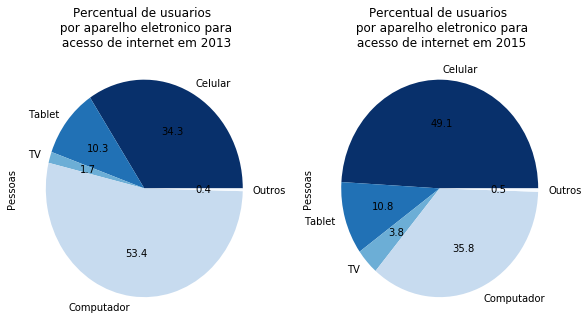

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
dados2013.Pessoas.plot(kind='pie',title='Percentual de usuarios \n por aparelho eletronico para\n acesso de internet em 2013',autopct='%.1f',colormap="Blues_r")
plt.subplot(132)
dados2015.Pessoas.plot(kind='pie',title='Percentual de usuarios \n por aparelho eletronico para\n acesso de internet em 2015',autopct='%.1f',colormap="Blues_r")
plt.show()

 Podemos observar que o aparelho que mais cresceu no numero de usuarios foi o celular


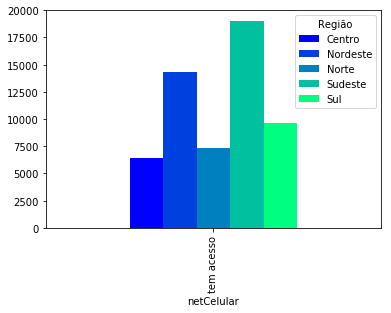

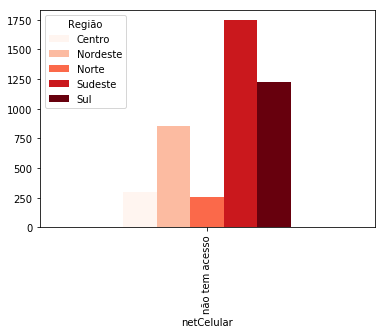

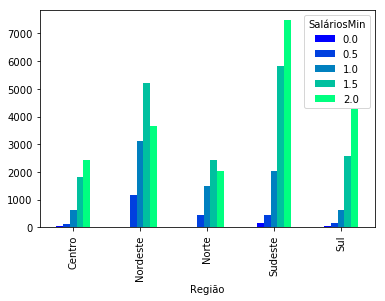

In [9]:
crosesta=pd.crosstab(DF.netCelular,DF.Região, margins=True)
crosesta.iloc[0:1,:5].plot.bar(colormap="winter")
crosesta.iloc[[1],:5].plot.bar(colormap="Reds")
crosminreg=pd.crosstab(DF.Região,DF.SaláriosMin, margins=True)
crosminreg.iloc[0:5,:5].plot.bar(colormap="winter")
plt.grid=(True)
plt.show()

Com esses gráficos fica evidente, que no Sudeste onde a região e mais populosa e as pessoas tem mais poder finaceiro, o mercado de celulares é mais forte do que nas outras regiões.

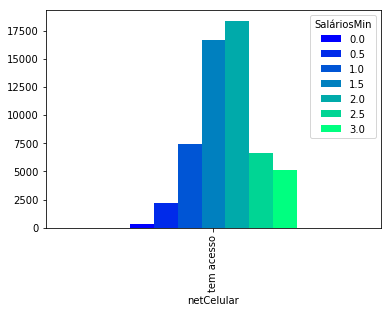

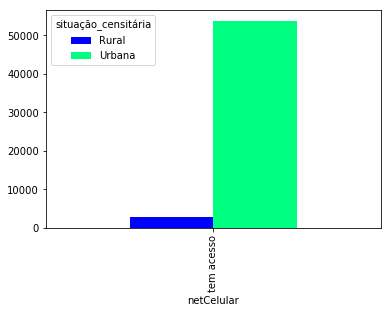

In [10]:
DF.Região="Sudeste"
crosscel=pd.crosstab(DF.netCelular,DF.SaláriosMin, margins=True)
crosscel.iloc[0:1,:7].plot.bar(colormap="winter")
crosscel=pd.crosstab(DF.netCelular,DF.situação_censitária, margins=True)
crosscel.iloc[0:1,:2].plot.bar(colormap="winter")
crosscel=pd.crosstab(DF.Região,DF.SaláriosMin, margins=True)
plt.show()


Por esses gráficos podemos concluir que o a melhor situçāo censitária é a zona urbana, e que o maior número de celulares vendidos foi para pessoas que recebém dois salários minimos. 

# Conclusão:
Podemos concluir que o celular foi o aparelho eletrônico mais usado para acessar internet, o crescimento de 15% em dois anos, deixa claro que ele é a melhor plataforma para se investir em sofwares on lines.                 Também pudemos concluir que a melhor região para o investimento foi a aréa urbana da região sudeste do país. Sendo as pessoas alvo, as que ganham entre 1.5 e 2 salários mínimos.
